### Data Preprocessing (site2, Office)

In [2]:
import pandas as pd

In [33]:
import datetime
e = '%Y-%m-%d %H:%M'
for i in range(1,len(train)):
    d = datetime.datetime.strptime(train['timestamp'][i], e)
    train['timestamp'][i]=datetime.datetime.strftime(d, '%Y-%m-%d %H:%M:%S')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [34]:
train.head()

,timestamp,meter_reading
0,2016-01-01 00:00:00,28.10
1,2016-01-01 01:00:00,26.57
2,2016-01-01 02:00:00,25.73
3,2016-01-01 03:00:00,25.96
4,2016-01-01 04:00:00,25.59


In [21]:
train = pd.read_csv("alltime.csv")
w_train = pd.read_csv("data/weather_train.csv")
meta_building = pd.read_csv("data/building_metadata.csv")

In [22]:
train.head()

,timestamp,meter_reading
0,2016-01-01 0:00,28.10
1,2016-01-01 1:00,26.57
2,2016-01-01 2:00,25.73
3,2016-01-01 3:00,25.96
4,2016-01-01 4:00,25.59


In [51]:
b0_weather = w_train[w_train['site_id'] == 2]

In [52]:
b0_weather.isnull().sum()

site_id                  0
timestamp                0
air_temperature          1
cloud_coverage        2354
dew_temperature          1
precip_depth_1_hr       66
sea_level_pressure      44
wind_direction         591
wind_speed               5
dtype: int64

In [53]:
b0_weather.shape

(8783, 9)

In [54]:
import matplotlib.pyplot as plt

In [55]:
b0_weather = b0_weather.drop(columns = ['cloud_coverage'])

In [56]:
b0_weather.isnull().sum()

site_id                 0
timestamp               0
air_temperature         1
dew_temperature         1
precip_depth_1_hr      66
sea_level_pressure     44
wind_direction        591
wind_speed              5
dtype: int64

In [57]:
b0_weather = b0_weather.fillna(method = "bfill")

In [58]:
date_tmp = train['timestamp']

KeyError: 'timestamp'

In [59]:
train.head()

,meter_reading
timestamp,
2016-01-01 00:00:00,28.10
2016-01-01 01:00:00,26.57
2016-01-01 02:00:00,25.73
2016-01-01 03:00:00,25.96
2016-01-01 04:00:00,25.59


In [60]:
b0_weather.head()

,site_id,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
17547,2,2016-01-01 00:00:00,15.6,-5.6,0.0,1015.3,270.0,3.6
17548,2,2016-01-01 01:00:00,13.9,-5.6,0.0,1015.6,270.0,4.1
17549,2,2016-01-01 02:00:00,13.3,-5.6,0.0,1016.0,270.0,3.1
17550,2,2016-01-01 03:00:00,12.2,-6.1,0.0,1016.6,280.0,3.1
17551,2,2016-01-01 04:00:00,11.7,-6.7,0.0,1017.0,270.0,3.1


In [61]:
b0_weather = b0_weather.set_index('timestamp')

In [62]:
train = train.set_index('timestamp')

KeyError: 'timestamp'

In [63]:
b0_weather.head()

,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,
2016-01-01 00:00:00,2,15.6,-5.6,0.0,1015.3,270.0,3.6
2016-01-01 01:00:00,2,13.9,-5.6,0.0,1015.6,270.0,4.1
2016-01-01 02:00:00,2,13.3,-5.6,0.0,1016.0,270.0,3.1
2016-01-01 03:00:00,2,12.2,-6.1,0.0,1016.6,280.0,3.1
2016-01-01 04:00:00,2,11.7,-6.7,0.0,1017.0,270.0,3.1


In [37]:
train.head()

,meter_reading
timestamp,
2016-01-01 00:00:00,28.10
2016-01-01 01:00:00,26.57
2016-01-01 02:00:00,25.73
2016-01-01 03:00:00,25.96
2016-01-01 04:00:00,25.59


In [64]:
mer_b0 = pd.merge(train, b0_weather, left_index = True, right_index = True ,how = 'left')

In [65]:
mer_b0.head()

,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,28.10,2.0,15.6,-5.6,0.0,1015.3,270.0,3.6
2016-01-01 01:00:00,26.57,2.0,13.9,-5.6,0.0,1015.6,270.0,4.1
2016-01-01 02:00:00,25.73,2.0,13.3,-5.6,0.0,1016.0,270.0,3.1
2016-01-01 03:00:00,25.96,2.0,12.2,-6.1,0.0,1016.6,280.0,3.1
2016-01-01 04:00:00,25.59,2.0,11.7,-6.7,0.0,1017.0,270.0,3.1


In [68]:
mer_b0.to_csv('mer_weather.csv')

### Application
used https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

In [1]:
import pandas as pd
mer_b0=pd.read_csv('mer_weather.csv')

In [2]:
dataset=mer_b0.drop(['site_id'], axis=1)

In [3]:
dataset=dataset.set_index('timestamp')

In [4]:
dataset.head()

,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,
2016-01-01 00:00:00,28.10,15.6,-5.6,0.0,1015.3,270.0,3.6
2016-01-01 01:00:00,26.57,13.9,-5.6,0.0,1015.6,270.0,4.1
2016-01-01 02:00:00,25.73,13.3,-5.6,0.0,1016.0,270.0,3.1
2016-01-01 03:00:00,25.96,12.2,-6.1,0.0,1016.6,280.0,3.1
2016-01-01 04:00:00,25.59,11.7,-6.7,0.0,1017.0,270.0,3.1


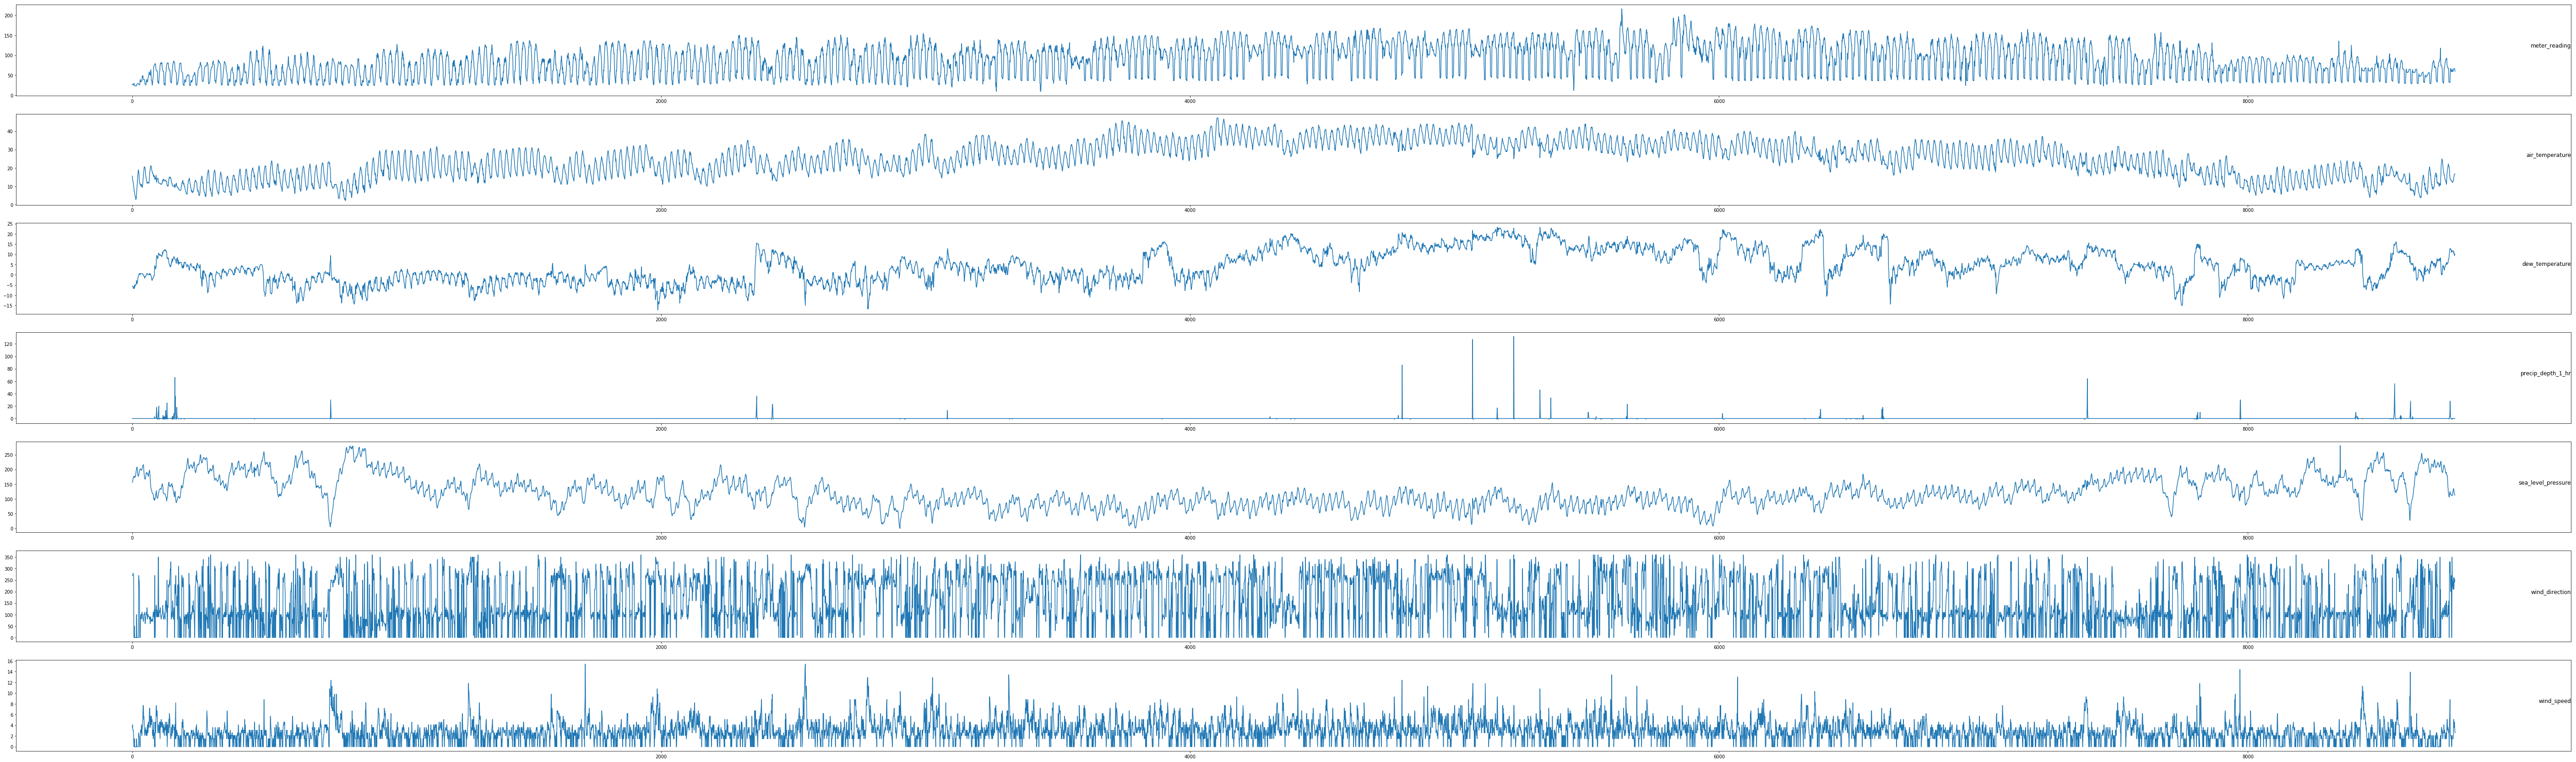

In [9]:
from matplotlib import pyplot
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
# plot each column
pyplot.figure(figsize=(100,30))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

window_size=4

# frame as supervised learning
reframed = series_to_supervised(scaled, window_size, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[29,30,31,32,33,34]], axis=1, inplace=True)
print(reframed.head())

   var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var5(t-4)  var6(t-4)  \
4   0.090175   0.297778   0.286420   0.007519   0.555160   0.750000   
5   0.082777   0.260000   0.286420   0.007519   0.565836   0.750000   
6   0.078716   0.246667   0.286420   0.007519   0.580071   0.750000   
7   0.079828   0.222222   0.274074   0.007519   0.601424   0.777778   
8   0.078039   0.211111   0.259259   0.007519   0.615658   0.750000   

   var7(t-4)  var1(t-3)  var2(t-3)  var3(t-3)    ...     var6(t-2)  var7(t-2)  \
4   0.233766   0.082777   0.260000   0.286420    ...      0.750000   0.201299   
5   0.266234   0.078716   0.246667   0.286420    ...      0.777778   0.201299   
6   0.201299   0.079828   0.222222   0.274074    ...      0.750000   0.201299   
7   0.201299   0.078039   0.211111   0.259259    ...      0.722222   0.097403   
8   0.201299   0.081520   0.173333   0.259259    ...      0.000000   0.000000   

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
4   0.079828   

In [70]:
#split train and test
values = reframed.values
n_train_hours = 200*24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window_size, int(train_X.shape[1]/window_size)))
test_X = test_X.reshape((test_X.shape[0], window_size, int(test_X.shape[1]/window_size)))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4800, 4, 7) (4800,) (3975, 4, 7) (3975,)


In [21]:
train_X

array([[[0.09017503, 0.2977778 , 0.28641978, ..., 0.55516016,
         0.75      , 0.23376623],
        [0.08277729, 0.26      , 0.28641978, ..., 0.5658363 ,
         0.75      , 0.26623377],
        [0.07871579, 0.24666667, 0.28641978, ..., 0.58007115,
         0.75      , 0.2012987 ],
        [0.07982786, 0.22222221, 0.27407408, ..., 0.6014235 ,
         0.7777778 , 0.2012987 ]],

       [[0.08277729, 0.26      , 0.28641978, ..., 0.5658363 ,
         0.75      , 0.26623377],
        [0.07871579, 0.24666667, 0.28641978, ..., 0.58007115,
         0.75      , 0.2012987 ],
        [0.07982786, 0.22222221, 0.27407408, ..., 0.6014235 ,
         0.7777778 , 0.2012987 ],
        [0.07803887, 0.2111111 , 0.25925928, ..., 0.61565834,
         0.75      , 0.2012987 ]],

       [[0.07871579, 0.24666667, 0.28641978, ..., 0.58007115,
         0.75      , 0.2012987 ],
        [0.07982786, 0.22222221, 0.27407408, ..., 0.6014235 ,
         0.7777778 , 0.2012987 ],
        [0.07803887, 0.2111111 , 0.2

In [22]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4800, 4, 7) (4800,) (3975, 4, 7) (3975,)


In [23]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [24]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 4800 samples, validate on 3975 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 4s - loss: 0.1085 - val_loss: 0.1156
Epoch 2/50
 - 1s - loss: 0.0992 - val_loss: 0.1072
Epoch 3/50
 - 1s - loss: 0.0893 - val_loss: 0.0996
Epoch 4/50
 - 1s - loss: 0.0811 - val_loss: 0.0919
Epoch 5/50
 - 1s - loss: 0.0744 - val_loss: 0.0866
Epoch 6/50
 - 1s - loss: 0.0696 - val_loss: 0.0819
Epoch 7/50
 - 1s - loss: 0.0651 - val_loss: 0.0789
Epoch 8/50
 - 1s - loss: 0.0616 - val_loss: 0.0753
Epoch 9/50
 - 1s - loss: 0.0576 - val_loss: 0.0711
Epoch 10/50
 - 1s - loss: 0.0535 - val_loss: 0.0670
Epoch 11/50
 - 1s - loss: 0.0499 - val_loss: 0.0641
Epoch 12/50
 - 1s - loss: 0.0476 - val_loss: 0.0623
Epoch 13/50
 - 1s - loss: 0.0454 - val_loss: 0.0591
Epoch 14/50
 - 1s - loss: 0.0436 - val_loss: 0.0565
Epoch 15/50
 - 1s - loss: 0.0426 - val_loss: 0.0541
Epoch 16/50
 - 1s - loss: 0.0414 - val_loss: 0.0524
Epoch 17/50
 - 1s - loss: 0.0404 - val_loss: 0.0517
Epoch 18/50
 - 1s - loss: 0.0

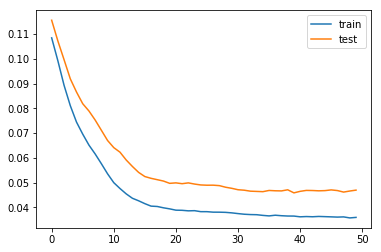

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [29]:
 test_X.shape

(3975, 4, 7)

In [58]:
test_X = test_X.reshape((test_X.shape[0], 4, 7))

In [71]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], window_size*test_X.shape[2]))
test_X[:,1:]
# # invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:7]), axis=1)
inv_yhat
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_y
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:7]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 14.656


In [80]:
inv_y.shape

(3975,)

### EDA

In [72]:
r=np.concatenate((yhat, test_X[:, 1:7]), axis=1)
r=scaler.inverse_transform(r)
r=pd.DataFrame(r)

In [73]:
len(r[0])

3975

In [82]:
def plot_series(time, series, format="-",start=0,end=None):
    plt.plot(time[start:end],series[start:end],format)
    plt.xlabel("Time")
    plt.ylabel("meter reading")
    plt.grid(True)

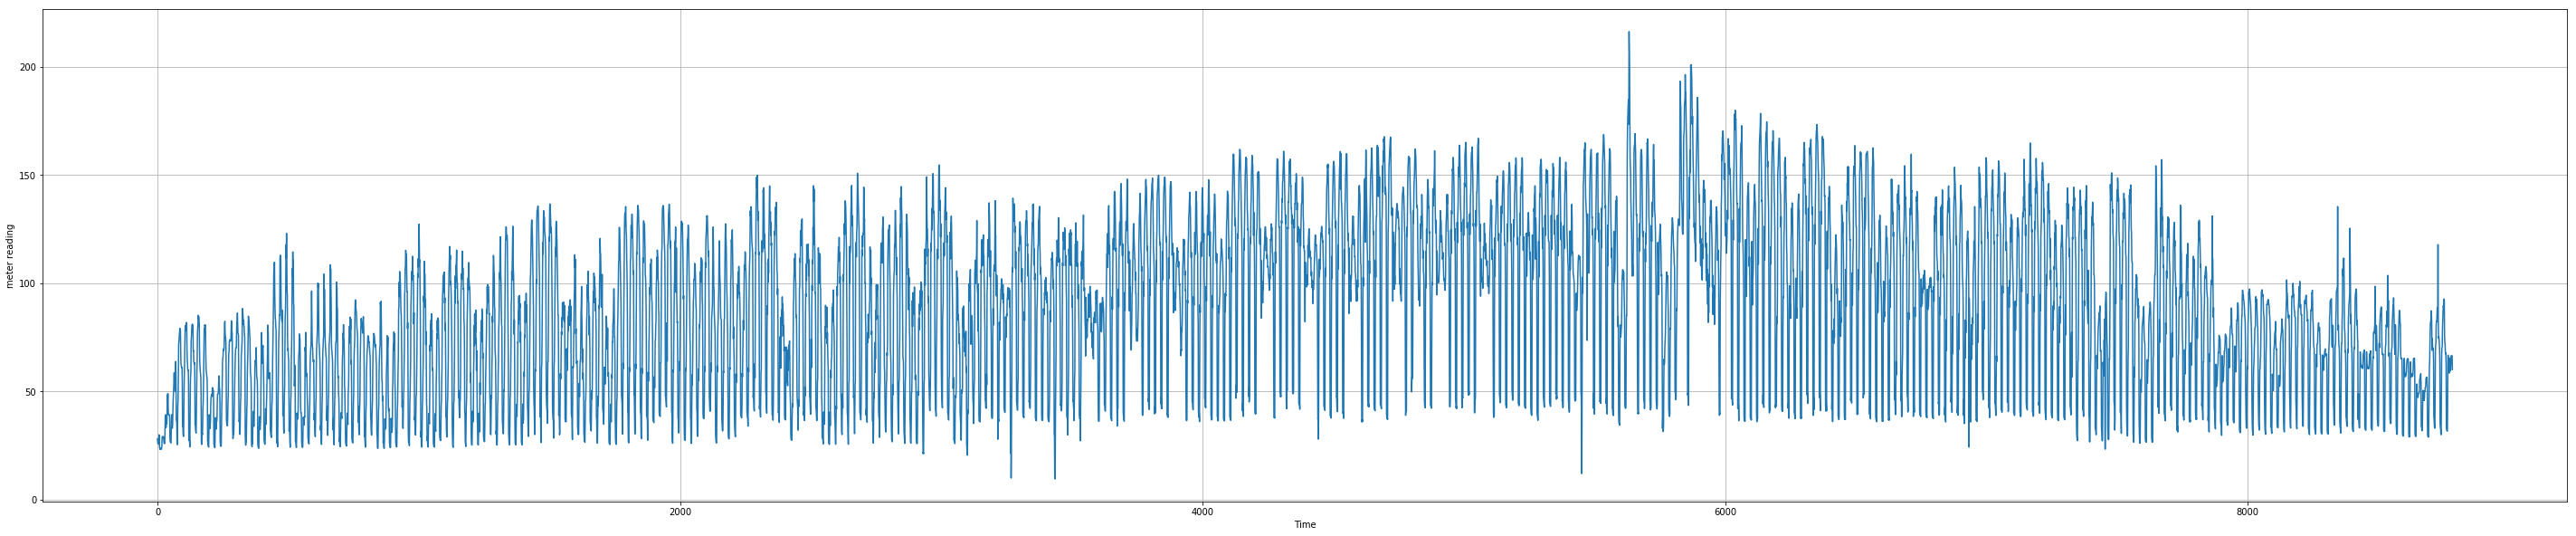

In [61]:
import matplotlib.pyplot as plt
series = np.array(graph_all)
time_step=[]
for x in range(len(series)):
    time_step.append(x)
time=np.array(time_step)
plot_series(time,series)

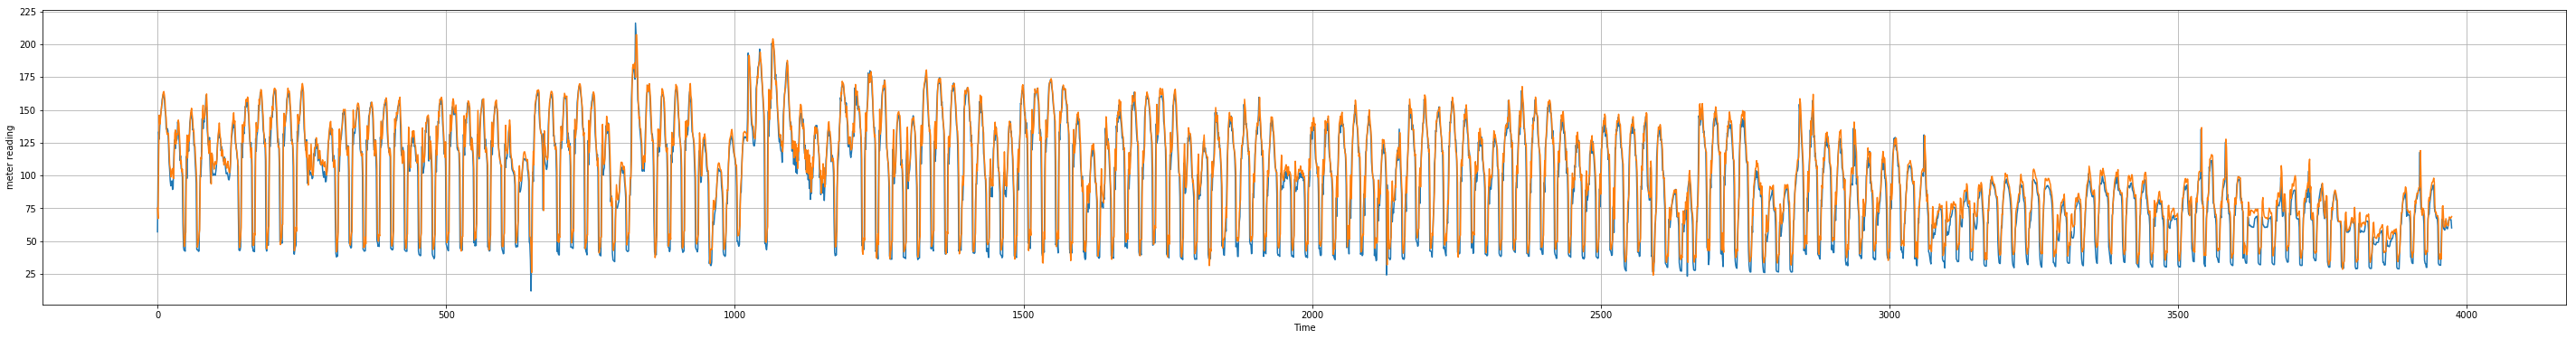

In [83]:
import matplotlib.pyplot as plt
series = inv_y
time_step=[]
for x in range(len(series)):
    time_step.append(x)
time=np.array(time_step)
plt.figure(figsize=(50, 6))
plot_series(time,series)
plot_series(time,r[0])